In [ ]:

import numpy as np
import math
from scipy.stats import binom, poisson, norm

getallen = [2, 12, 15, 16, 18, 22, 24, 25, 28, 29, 30, 25, 40, 42, 46]

## Basis functies
Afronden op 2 getallen na de komma

In [ ]:
print(format(10.254874, '.4g'))

## Centrummaten en speidingsmaten
Gemiddele is de verwachte waarde

In [ ]:
print(np.mean(getallen))

Standaard afwijking is hoeveel afwijking er is op de verwachte waarden

In [ ]:
print(np.std(getallen))

# 1. Kansbegrippen

## Formule van Laplace
Als de elementaire gebeurtenissen $E_i$ evenveel kans (ze zijn [uniform verdeeld](https://nl.wikipedia.org/wiki/Uniforme_verdeling_(discreet))) hebben om op te treden kan je deze formule gebruiken om de kans te berekenen op gebeurtenis $G=\{E_1,E_2, \dots, E_n\}$

$$P(G) = \frac{\#G}{\#U}$$

In het algemene geval moet je het aantal elementen tellen in de verzameling G.

### Werpen van 2 dobbelstenen simuleren
We maken een dataframe met twee kolommen: een tuple met de waarde van de ogen, en som van het totaal aantal ogen. Met dit dataframe kunnen we enkele kansen berekenen.

In [1]:
import numpy as np
import pandas as pd

dobbelstenen = pd.DataFrame([((d1, d2), d1+d2) for d1 in range(1,7) for d2 in range(1,7)],
                            columns=['worp','som'],
                            index = [i for i in range(1,37)])
dobbelstenen.head()

,worp,som
1,"(1, 1)",2
2,"(1, 2)",3
3,"(1, 3)",4
4,"(1, 4)",5
5,"(1, 5)",6


Bereken de kans op gebeurtenis $G$, de som van de ogen van twee dobbelstenen tenminste 4 is. We doen dit op twee manieren:
* formule van Laplace
* $1 - \bar{G}$

In [2]:
print(len(dobbelstenen.query('som >= 4')) / len(dobbelstenen))
print(1 - len(dobbelstenen.query('som < 4')) / len(dobbelstenen))

0.9166666666666666
0.9166666666666666


### Kansmodel
We kunnen ook alle combinaties berekenen die bij een bepaalde som horen.

In [3]:
dobbelstenen.groupby(by=['som'])['worp'].apply(list)

som
2                                             [(1, 1)]
3                                     [(1, 2), (2, 1)]
4                             [(1, 3), (2, 2), (3, 1)]
5                     [(1, 4), (2, 3), (3, 2), (4, 1)]
6             [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)]
7     [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]
8             [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)]
9                     [(3, 6), (4, 5), (5, 4), (6, 3)]
10                            [(4, 6), (5, 5), (6, 4)]
11                                    [(5, 6), (6, 5)]
12                                            [(6, 6)]
Name: worp, dtype: object

### Een boek kaarten maken

In [ ]:
# kleuren en waarden definiëren
kleuren = np.array(['Harten','Ruiten','Schoppen','Klaveren'])
nummers = np.arange(2,11).astype('str')
waarden = np.concatenate((['Aas'], nummers, ['Boer','Dame','Heer']))
combinaties = np.stack(np.meshgrid(kleuren, waarden), -1).reshape(-1, 2)
boek = pd.DataFrame(combinaties, columns=['kleur','waarde'], index=range(1,combinaties.shape[0]+1))
boek.head()

In [ ]:
boek.query("kleur == 'Harten'")['kleur'].size
len(boek.query("kleur == 'Harten'"))

* $P(K=Aas)$
* $P(K=4)$

In [ ]:
n = len(boek) # aantal elementen in de uitkomstenverzameling U
display('Aantal elementen in uitkomstenverzameling is {}'.format(n))
display('Kans op een Aas is {:.3f}'.format(len(boek.query("waarde in ['Aas']")) / n))
display('Kans op een 4 is {:.3f}'.format(len(boek.query("waarde in ['4']")) / n))
display('Kans op een Aas of een 4 is {:.3f}'.format(len(boek.query("waarde == '4' or waarde == 'Aas'")) / n))

## Relaties met frequenties
Een kansmodel is een theoretisch model voor een bepaalde probleem. We kunnen dat probleem ook herhaaldelijk uitvoeren en dan tellen hoe vaak bepaalde elementaire gebeurtenissen optreden. Na een oneindig aantal experimenten komen we dezelfde kansen uit als die van het kansmodel.

Hieronder simuleren we 1000 worpen met 2 dobbelstenen.

In [ ]:
d1 = np.random.choice(range(1,7),1000)
d2 = np.random.choice(range(1,7),1000)
ax = pd.Series(d1 + d2).value_counts(normalize=True, sort=False).plot.bar()
ax.grid(linestyle='--', axis='y')

In [ ]:
dobbelstenen.som.to_numpy().reshape(6,-1)

## Somregel
$P(A \cup B) = P(A) + P(B) - P(A \cap B)$

#### Voorbeeld 1 - lege doorsnede
$P(K=Aas~of~K=4) = P(K=Aas) + P(K=4) - P(K=Aas~en~K=4)$
$\phantom{P(K=Aas~of~K=4)} = \frac{4}{52} + \frac{4}{52} - \frac{0}{52}$


In [ ]:
print('Aantal azen: {}'.format(len(boek.query("waarde == 'Aas'"))))
print('Aantal vieren: {}'.format(len(boek.query("waarde == '4'"))))
print('Aantal kaarten die Aas en een 4 is {}'.format(len(boek.query("waarde == '4' and waarde == 'Aas'"))))

#### Voorbeeld 2 - geen lege doorsnede
$P(K=Harten~of~K=Aas) = P(K=Harten) + P(K=Aas) - P(K=Aas~en~K=4)$
$\phantom{P(K=Harten~of~K=Aas)} = \frac{13}{52} + \frac{4}{52} - \frac{1}{52}$

In [ ]:
azen = boek.query("waarde == 'Aas'")
harten = boek.query("kleur == 'Harten'")
hartenaas = boek.query("kleur == 'Harten' and waarde == 'Aas'")
print(harten.append(azen).shape)
print(harten.append(azen).drop_duplicates().shape)

## Productregel
Zie png voor voorbeelden


## Wet van totale kans
Zie png voor voorbeelden

## Wet van Bayes

### Vraag 10
Als het hard regent (R=1), is er 50% kans dat mijn kelder onderloopt (O=1).  Het regent gemiddeld 35 dagen/jaar hard en mijn kelder loopt 20 dagen per jaar onder water (dus ook soms als het niet hard regent).
Als mijn kelder ondergelopen is (gegeven dat O=1), wat is dan de kans dat dit komt doordat het hard regent (R=1)?

<u>Toevalsveranderlijken</u>

Ze zijn discreet omdat ze maar een beperkt aantal waarden kunnen aannemen.

* $R=\{0,1\}$

* $O=\{0,1\}$

<u>Priorkansen</u>

$P(R) = [\frac{330}{365},\frac{35}{365}]$

$P(O) = [\frac{345}{365},\frac{20}{365}]$

<u>Voorwaardelijke kansen</u>

$P(O=1 \mid R=1) = 0.5$

$P(R=1 \mid O=1) = \frac{P(O=1 \mid R=1) \cdot P(R=1)}{P(O=1)}$

$\phantom{P(R=1 \mid O=1)}= 0.5 \cdot \frac{\frac{35}{365}}{\frac{20}{365}}$

$\phantom{P(R=1 \mid O=1)}= 0.875$




# 2. Kansverdelingen
## Toevalsveranderlijken

In [10]:
def X(teerling: str):
  stippen = {
        'een': 1,
        'twee': 2,
        'drie': 3,
        'vier': 4,
        'vijf': 5,
        'zes': 6
        }
  return stippen[teerling]

def Y(teerling1: str, teerling2: str):
    stippen = {
        'een': 1,
        'twee': 2,
        'drie': 3,
        'vier': 4,
        'vijf': 5,
        'zes': 6
        }
    return stippen[teerling1] + stippen[teerling2]

In [9]:
print(X('twee'))
print(Y('drie','vijf'))

2
8


## Eenvoudige kansverdeling

### Worp van een dobbelsteen
*X = "Aantal ogen op de bovenzijde van een dobbelsteen"*


In [11]:
def P(waarde : int):
  kansmodel = {
        1: 1/6,
        2: 1/6,
        3: 1/6,
        4: 1/6,
        5: 1/6,
        6: 1/6
        }
  return kansmodel.get(waarde, 0)

print(P(X('twee')))

0.16666666666666666


### Som aantal ogen van twee dobbelstenen
*X = "Som van de ogen van 2 dobbelstenen"*


Experimenteel gevonden verdeling

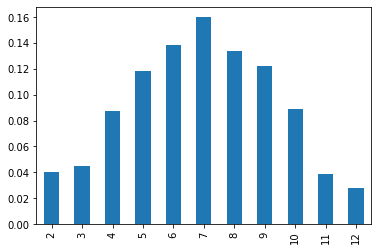

In [12]:
d1 = np.random.choice(range(1,7),1000)
d2 = np.random.choice(range(1,7),1000)
ax = pd.Series(d1 + d2).value_counts(normalize=True, sort=False).plot.bar()

Theoretische verdeling

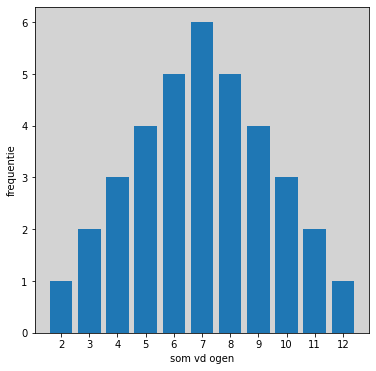

In [21]:
frequenties = dobbelstenen['som'].value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.bar(frequenties.index, frequenties.values)
ax.set_xlabel('som vd ogen')
ax.set_ylabel('frequentie')
ax.set_facecolor('lightgrey')
_ = ax.set_xticks(range(2,13))

### Kansspelletje
*X = "10€ voor gooien van een 6, -1€ voor andere waarde"*


In [23]:
import numpy as np
x = [-1]*5 + [10]
uniformkansmodel = [1/6] * 6
experiment = pd.Series(np.random.choice(x, size=100, replace=True, p=uniformkansmodel))
display(experiment.to_numpy())
experiment.value_counts(normalize=True)

array([-1, -1, 10, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, 10, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, 10,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, 10, -1, -1, 10, -1, -1, 10, -1, 10, -1, -1, 10, 10, 10, -1,
       10, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

-1     0.85
 10    0.15
dtype: float64

## Binomiale kansverdeling
 Gebruiken als we willen weten wat de kans is op een success of geen success een aantal keer achter elkaar.
 $\binom{n}{k}$

### Voorwaarden
 * je doet een experiment een aantal keer achter elkaar.
 * de uitkomst van het experiment beïnvloedt het resultaat van het volgende experiment niet.
 * de uitkomst van het experiment kan slechts 2 mogelijke waarden opleveren.
 * je weet wat de kans is om de 2 waarden te verkrijgen als je het experiment 1 keer uitvoert.
 * je vraagt je af wat de kans is dat je een aantal keren een bepaalde waarde verkrijgt.

### Eigenschappen
N = aantal keer dat het experiment plaats vindt
<br>
bv. 6 keer een rood licht, 10 stundenten, 5 vragen

<br>
K = aantal keer dat je een succes of geen success wil.
<br>bv. hoeveel keer kop, hoeveel vragen juist
<br>

<br>
P = de kans op de gebeurtenis.
<br>bv. 1/2 0.50

### Sigma & Mu
**De standaard afwijking**
<br>
σ = $\sqrt{n.p()1-p)}$

**Het verwachte gemiddelde**
<br>
µ = n.p

### Functies
**Kans op x aantal successen**
```python
stats.binom.pmf(k=2,n=4,p=2/6)
```
**Kans op GEEN x aantal successen**
```python
1 - stats.binom.pmf(k=2,n=4,p=2/6)
```
**Kans op x aantal keer of MINDER**
```python
stats.binom.cmf(k=2,n=4,p=2/6)
```
**Kans op x aantal keer of MEER**
```python
1 - stats.binom.cmf(k=2,n=4,p=2/6)
```

### Voorbeeld
Examen met 5 meerkeuzevragen. Iedere vraag heeft 4 mogelijke antwoorden, waarvan 1 juist
* Wat is de kans dat we exact 2 vragen juist beantwoorden?
* Wat is dus de kans om te slagen op dit examen?


*X="Wat is de kans op 2 successen"*

$X \sim B(5,\frac{1}{4})$


In [15]:
from scipy.stats import binom
n = 5
p = 1/4
x = 2
print('Kans om exact 2 vragen juist te hebben: {:.3f}'.format(binom.pmf(k=x, n=5, p=p)))
print('Kans om 2 vragen of MINDER juist te hebben: {:.3f}'.format(binom.cdf(k=x, n=5, p=p)))

Kans om exact 2 vragen juist te hebben: 0.264
Kans om 2 vragen of MINDER juist te hebben: 0.896


*X = "Wat is de kans op 3 successen of meer"* aka. "Wat is de kans om te slagen?"

$X \sim 1-B(5,\frac{1}{4})$

In [16]:
1 - binom.cdf(k=2, n=n, p=p)

0.103515625

We kunnen de kansen ook berekenen voor **alle** successen.

[0, 1, 2, 3, 4, 5]
[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]


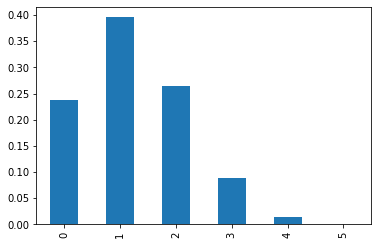

In [17]:
aantal_successen = range(6)
p = 1/4 # kans op succes
print(list(aantal_successen))
kansverdeling = binom.pmf(k=aantal_successen, n=5, p=p)
print(kansverdeling)
_ = pd.Series(kansverdeling).plot.bar()

De cumulatieve verdeling toont ook heel goed hoeveel de kans op slagen bedraagt.
<br>
*De rode staven visualiseren gewoon dat je niet geslaagd bent*


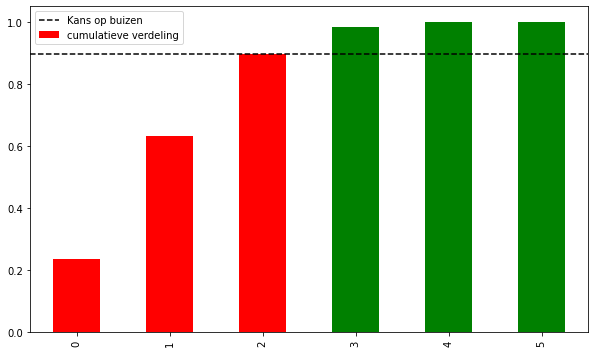

In [18]:
cumulatieve_verdeling = binom.cdf(k=aantal_successen, n=5, p=p)
ax = pd.Series(cumulatieve_verdeling).plot.bar(color = 3 *['red'] + 3* ['green'], label="cumulatieve verdeling", figsize=(10,6))
ax.axhline(cumulatieve_verdeling[2], linestyle ='--', color='black', label='Kans op buizen')
_ = ax.legend()


## Possionverdeling
De kans dat de gebeurtenis zich K keer voordoet in een bepaalde tijdspanne.

### Voorwaarden
* een bepaalde gebeurtenis doet zich gemiddeld een aantal keer voor per tijdseenheid, maar
er zit variatie op
* we vragen ons af wat de kans is dat deze gebeurtenis zich een aantal keer zal voordoen
binnen een bepaalde tijd

### Eigenschappen
K = de kans dat de gebeurtenis zich een aantal keer zal voordoen binnen een bepaalde tijd
<br>
bv. de kans dat er meer dan 10 oproepen per uur zouden binnen komen

α(mu) = gemiddeld aantal keer dat een gebeurtenis zicht voordoet
<br>
bv. op een help-desk komen er gemiddeld 3 oproepen per uur binnen

### Sigma & Mu
**De standaard afwijking**
<br>
σ = $\sqrt{α}$

**Het verwachte gemiddelde**
<br>
µ = reeds gekent

### Functies
**Kans dat er 10 oproepen binnen komen als we er gemiddeld 3 krijgen**
```python
stats.poisson.pmf(10, 3)
```
**Kans dat er GEEN 10 oproepen binnen komen als we er gemiddeld 3 krijgen**
```python
1 - stats.poisson.pmf(10, 3)
```
**Kans op MINDER dan 10 oproepen als we er gemiddeld 3 krijgen**
```python
stats.poisson.cdf(10, 3)
```
**Kans op MEER dan 10 oproepen als we er gemiddeld 3 krijgen**
```python
1 - stats.poisson.cdf(10, 3)
```
### Inverse cumulatieve verdeling
**Hoeveel mensen moeten we in dienst hebben om 95% van de tijd de klanten te kunnen helpen**

```python
stats.poisson.ppf(0.95, 3)
```

## Normale kansverdeling
Is een continue kansverdeling met twee parameters, de verwachtingswaarde µ en de standaardafwijking
σ waarvan een kansdichtheid wordt terug gegeven die zich tussen een bepaalde waarde bevindt.

### Voorwaarden
* je beschouwt een continue variabele
* je kent de waarden van de verwachte waarde (gemiddelde) en de standaardafwijking
* de waarden zijn symmetrisch verdeeld rond de verwachte waarde
* je vraagt je af wat de kans is dat een gemeten waarde tussen twee grenzen ligt

### Eigenschappen
µ(mu) = de gemiddelde waarden die we verwachten
<br>bv. een lengte van 180cm

σ(sigma) = de standaard afwijking
<br>bv. een lengte van 10cm

#### Functies
*We afvragen ons af wat de kans is dat een student
tussen de 175cm en 180cm groot is.*<br><br>
**Kans dat er iemand een lengte heeft van 150**
```python
stats.norm.pdf(x=150, loc=180, scale=10)
```
**Kans op minder dan**
```python
stats.norm.cdf
```
**Kans op meer dan**
```python
1 - stats.norm.cdf
```
**Kans dat het tussen de 42 en 52 valt?**
```python
format(stats.norm.cdf(x=52,loc=50,scale=5)-norm.cdf(x=42,loc=-50,scale=5),'.4g')

```
**q = omzetten in aantallen (inverse van cdf functie)**
```python
print(format(stats.norm.ppf(q=0.16, loc=100, scale=15),'.4g'))
```

De gemeten lengtes van jongens van 20 jaar is normaalverdeeld.

X = "De lengte van jongens van 20 jaar"

We verwachten een gemiddelde lengte van 180 cm met een standaardafwijking van 10 cm, dus:

$$X \sim N(\mu, \sigma)$$
$$X \sim N(180cm, 10cm)$$


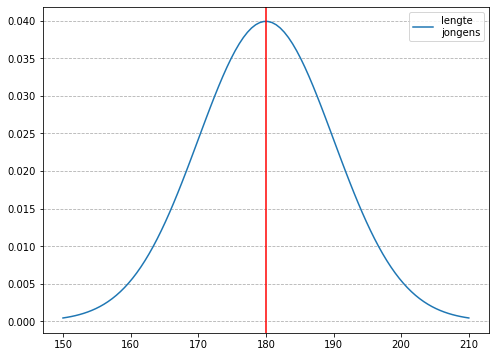

In [24]:
from scipy.stats import norm
lengtes = np.linspace(150,210,100)
kansverdeling = norm.pdf(lengtes, loc=180,scale=10)
ax = pd.DataFrame(kansverdeling,index=lengtes, columns=['lengte\njongens']).plot(figsize=(8,6))
ax.axvline(180, color='red')
ax.grid(linestyle = '--', axis='y')

In [ ]:
1 - norm.cdf(x=190, loc=180, scale=10)

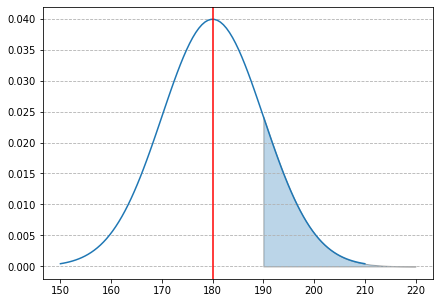

In [25]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(lengtes, kansverdeling)
x = np.linspace(190,220,100)
ax.axvline(180, color='red')
ax.grid(linestyle='--', axis='y')
_ = ax.fill_between(x, norm.pdf(x, loc=180, scale=10), alpha=0.3, edgecolor='black')

## Centrummaten van de vorige kansverdelingen

X = "Aantal ogen op de bovenzijde van een dobbelsteen"

In [26]:
import math

x  = np.arange(1,7)
p = np.array([1/6] * 6)
mu = (x * p).sum()
sigma = math.sqrt(((x - mu)**2 * p).sum())
print("Gemiddeld gooi je met 1 dobbelsteen {:.1f} ogen".format(mu))
print("Met een standaardafwijking van {:.2f}".format(sigma))

Gemiddeld gooi je met 1 dobbelsteen 3.5 ogen
Met een standaardafwijking van 1.71


*X = "Som van de ogen van 2 dobbelstenen"*


In [27]:
x = dobbelstenen.som.value_counts().index.to_numpy()
p = dobbelstenen.som.value_counts(normalize=True).to_numpy()
mu = (x * p).sum()
sigma = math.sqrt(((x - mu)**2 * p).sum())
# x, counts = np.unique(dobbelstenen.som, return_counts=True)
# p = counts / len(dobbelstenen)
# mu = (x * p).sum()
print("Gemiddeld gooi je met 2 dobbelstenen een som van {:.2f}".format(mu))
print("Met een standaardafwijking van {:.2f}".format(sigma))

Gemiddeld gooi je met 2 dobbelstenen een som van 7.00
Met een standaardafwijking van 2.42


X = "10€ voor gooien van een 6, -1€ voor andere waarde"

In [28]:
x = np.array([-1, 10])
p = np.array([5/6, 1/6])
mu = (x * p).sum()
sigma = math.sqrt(((x - mu)**2 * p).sum())
print("Op de lange termijn verdien je {:.2f}€ aan dit kansspel".format(mu))
print("Maar het gaat wel zweten worden, want de standaardafwijking bedraagt {:.2f}".format(sigma))

Op de lange termijn verdien je 0.83€ aan dit kansspel
Maar het gaat wel zweten worden, want de standaardafwijking bedraagt 4.10


X = "Aantal correct beantwoordde vragen op MC examen van 5 vragen met 4 opties"

In [30]:
n = 5
p = 1/4

mu = n * p
sigma = math.sqrt(n * p * (1 - p))
print("Gemiddelde correct beantwoorde vragen: {:.2f}".format(mu))
print("Met een standaardafwijking van {:.2f}".format(sigma))

Gemiddelde correct beantwoorde vragen: 1.25
Met een standaardafwijking van 0.97


# 3. Betrouwbaarheidsintervallen

## Normaalverdelingen

### Voor 1 laptop

We testen het verbruik van 1 latop.

<u>Toevalsveranderdelijke</u>:

$X$ = "Het verbruik van een laptop"

Stel dat we weten dat het verbruik van laptops normaal verdeeld is:
* gemiddelde is $\mu = 40$ Watt
* standaardafwijking is $\sigma = 20$ Watt

Dus $X \sim N(\mu, \sigma)$

Wat is de kans dat het verbruik tussen x en y ligt?

Wat is de kans dat het verbruik tussen $\mu - 2\cdot\sigma$ en $\mu + 2\cdot\sigma$ ligt?



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

verbruik = norm(loc=40,scale=20)
x = np.linspace(-20,100,100)
a = np.linspace(20,30,100)
b = np.linspace(40 - 2*20, 40 + 2*20)

fig, ax = plt.subplots(1,1)
ax.plot(x, verbruik.pdf(x))
ax.axvline(x=40, color='red')
ax.fill_between(b, verbruik.pdf(b), edgecolor='black', color='pink', alpha=0.3)
ax.fill_between(a, verbruik.pdf(a), edgecolor='black', alpha=0.3)
plt.show()
print("Kans op verbruik tussen 20 en 30 is {:.3f}".format(verbruik.cdf(30) - verbruik.cdf(20)))
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))

print("Kans op verbruik tussen 0 en 80 is {:.3f}".format(verbruik.cdf(80) - verbruik.cdf(0)))

### Voor n laptops

In dit geval testen we niet 1 laptop maar testen we er n. We nemen dus een steekproef van grootte n.

<u>Toevalsveranderdelijke</u>:

$\bar{X}$ = "Het gemiddeld verbruik van laptops in steekproef met grootte n"

We testen 30 laptops. Volgens de centrale limietstelling is $\bar{X}$ normaal verdeeld met:

* gemiddelde is $\mu = 40$ Watt
* standaardafwijking is $\sigma = \frac{20}{\sqrt{30}}$ Watt

Dus $\bar{X} \sim N(40, \frac{20}{\sqrt{30}})$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

n = 30

steekproefverdeling = norm(loc=40,scale=20/math.sqrt(30))

x = np.linspace(-20,100,100)
a = np.linspace(20,30,100)
b = np.linspace(40 - 2*20, 40 + 2*20)

fig, ax = plt.subplots(1,1)
ax.plot(x, steekproefverdeling.pdf(x))
ax.axvline(x=40, color='red')
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='pink', alpha=0.3)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', alpha=0.3)
plt.show()
print("Kans op gemiddeld verbruik tussen 20 en 30 is {:.3f}".format(steekproefverdeling.cdf(30) - steekproefverdeling.cdf(20)))
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))
print("Kans op gemiddeld verbruik tussen 0 en 80 is {:.3f}".format(steekproefverdeling.cdf(80) - steekproefverdeling.cdf(0)))

### Betrouwbaarheidsinterval **factor** berekenen bij normaalverdelingen

* p = 90%
* p = 95%
* p = 95.5%
* ..

Met de functie <code>norm.ppf</code>

In [ ]:
mijnverdeling = norm(loc=40, scale=20/np.sqrt(30))
mijnverdeling.ppf([(1-0.955)/2, (1+0.955)/2])

In [ ]:
standaardnormaal = norm()
intervallen = [0.9, 0.95, 0.955, 0.99]


for p in intervallen:
  lg = (1 - p)/2
  rg = (1 + p)/2

  print("Factoren voor betrouwbaarheidsinterval van {:.1f}%\n".format(p*100))
  print("In Z-scores: ", standaardnormaal.ppf(q=[lg, rg]))
  print("In verbruik: ", verbruik.ppf(q=[lg,rg]))
  print("In gemiddelde verbruik:" , steekproefverdeling.ppf(q=[lg,rg]))
  print()

## Studentverdelingen

Probleemstelling:

* indien we $\sigma$ door s benaderen, omdat we $\sigma$ niet kennen OF
* als n klein is (<30)

$\Rightarrow$ normaalverdeling is slechte benadering, gebruik Student t-verdeling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

n = 30
sd = 20

studentverdeling = t(n-1)
t = np.linspace(-4,4,100)
a = np.linspace(-1,1, 100)
b = np.linspace(0 - 2*1, 0 + 2*1, 100)

fig, ax = plt.subplots(1,1)
ax.plot(t, studentverdeling.pdf(t), label='t-verdeling')
# ax.axvline(x=0, color='red')
# ax.fill_between(b, studentverdeling.pdf(b), edgecolor='black', color='pink', alpha=0.3)
# ax.fill_between(a, studentverdeling.pdf(a), edgecolor='black', alpha=0.3)
ax.legend()
plt.show()

# we moeten nu t-scores gebruiken, want Student-verdeling is gecentreerd rond 0
t1 = (20 - 40) / sd
t2 = (30 - 40) / sd

print("Kans op verbruik tussen 20 en 30 is {:.3f}".format(studentverdeling.cdf(t2) - studentverdeling.cdf(t1)))
t1 = (30 - 40) / sd
t2 = (50 - 40) / sd
print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(studentverdeling.cdf(t2) - studentverdeling.cdf(t1)))
t1 = (0 - 40) / sd
t2 = (80 - 40) / sd
print("Kans op verbruik tussen 0 en 80 is {:.3f}".format(studentverdeling.cdf(t2) - studentverdeling.cdf(t1)))

In [ ]:
mu = 40
s = 20
x = 80

t = (x - mu) / s
t*s + mu

### Voor n laptops

We gaan er dus nu niet van uit dat we $\sigma$ niet kennen, maar dat we enkel de standaardafwijking $s$ kennen.

<u>Toevalsveranderdelijke</u>:

$\bar{X}$ = "Het gemiddeld verbruik van laptops in steekproef met grootte n"

We testen 30 laptops.
Ondanks dat de centrale limietstelling stelt dat $\bar{X}$ normaalverdeeld is met parameters:

* gemiddelde is $\mu = 40$ Watt
* standaardafwijking is $\sigma = \frac{20}{\sqrt{30}}$ Watt

gebruiken we **ditmaal** toch een studentverdeling: $\bar{X} \sim t(30-1)$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import math

n = 30

steekproefverdeling = t(n-1)

t = np.linspace(-3,3,100)
a = np.linspace(-1,1,100)
b = np.linspace(0 - 2*1, 0 + 2*1)

fig, ax = plt.subplots(1,1)
ax.plot(t, steekproefverdeling.pdf(t), label='steekproefgemiddelde')
ax.axvline(x=0, color='red')
ax.fill_between(b, steekproefverdeling.pdf(b), edgecolor='black', color='pink', alpha=0.3)
ax.fill_between(a, steekproefverdeling.pdf(a), edgecolor='black', alpha=0.3)
ax.legend()
plt.show()

# print("Kans op gemiddeld verbruik tussen 20 en 30 is {:.3f}".format(steekproefverdeling.cdf(30) - steekproefverdeling.cdf(20)))
# print("Kans op verbruik tussen 30 en 50 is {:.3f}".format(verbruik.cdf(50) - verbruik.cdf(30)))
# print("Kans op gemiddeld verbruik tussen 0 en 80 is {:.3f}".format(steekproefverdeling.cdf(80) - steekproefverdeling.cdf(0)))

### Betrouwbaarheidsinterval **factor** berekenen bij normaalverdelingen

* p = 90%
* p = 95%
* p = 95.5%
* ..

Met de functie <code>norm.ppf</code>

In [ ]:
standaardnormaal = norm()
intervallen = [0.9, 0.95, 0.955, 0.99]


for p in intervallen:
  lg = (1 - p)/2
  rg = (1 + p)/2

  print("Factoren voor betrouwbaarheidsinterval van {:.1f}%\n".format(p*100))
  print("In Z-scores: ", standaardnormaal.ppf(q=[lg, rg]))
  print("In verbruik: ", verbruik.ppf(q=[lg,rg]))
  print("In gemiddelde verbruik:" , steekproefverdeling.ppf(q=[lg,rg]))
  print()



# 4. Toetsen van een hypothese

Bij toetsen gaan we uit van een veronderstelling en proberen na te gaan of we die kunnen bevestigen of verwerpen

* Hypothese = Veronderstelling
* We proberen de hypothese tegen te spreken
* Als we een meting doen die in de lijn ligt met de veronderstelling, hebben we niks bewezen
* Als we een meting doen die de hypothese tegen-spreekt, is er veel kans dat deze niet waar is


## Algemene stappenplan

  1. formuleer de **hypotheses**
  2. kies een **significantieniveau** $\alpha$
  3. doe een **steekproef** van grootte n
  4. gaat het om een **eenzijdig** of **tweezijdig** toets?
  5. stel een **aanvaardingsinterval** op: $p=1-\alpha$ of $p=1-\frac{\alpha}{2}$ m.b.v. *een* verdeling of bepaal de **P-value**
  6. trek een **besluit**

### Voorbeeld

<u>Stap 1</u>

* $H_0$: laptops verbruiken gemiddeld 31 Watt
    * H0 : $\mu = 31$
* $H_1$: laptops verbruiken gemiddeld **meer of minder** dan 31 Watt
    * H1 : $\mu \neq 31$

<u>Stap 2</u>

We kiezen $\alpha=0.05$. We hebben dus nog altijd 5% kans dat ons besluit door (stom toeval) verkeerd zal zijn. Dit moet op **voorhand** gekozen worden, en daarom dat wetenschappers meestal ook meerdere studies doen alvorens ze besluiten trekken.

<u>Stap 3</u>

We doen een steekproef van met grootte $n=30$.  In principe zouden we kunnen opteren om een normaalverdeling te gebruiken, maar omdat computertools het nu veel makkelijker maken om de Student t-verdeling te gebruiken en $n$ tegen grens van 30 ligt, gebruiken we dus hier de Student t-verdeling.

<u>Stap 4</u>
Door de formulering van de alternatieve hypothese $H_1$ weten we dat het hier gaat om een tweezijdige toets.

<u>Stap 5</u>

* bepaal eerst de grenzen $t_1$ en $t_2$ van het aanvaardingsinterval op de t-verdeling. Bij tweezijdige toets zijn dit de waarden van t die horen bij $\frac{\alpha}{2}$ en $1 - \frac{\alpha}{2}$

In [ ]:
import numpy as np
from scipy.stats import t
a = 0.05
n = 30
s = 20
x_bar = 40
mu0 = 31

steekproefverdeling = t(n-1)
t1, t2 = steekproefverdeling.ppf(q=[a/2, 1-a/2])
ts = np.array([t1,t2])
print(ts)


* Nu bepaal je wat de overeenkomstige x-waarden zijn van deze t-waarden. Hiervoor gebruik je de $\mu$ uit de nulhypothese $H_0$, dus in ons geval is $\mu_0 = 31$, want je gaat volgens $H_0$ uit van het feit dat de **steekproefgemiddeldes $\bar{x}$** liggen tussen:

$$\mu_0 + t_1\cdot\frac{s}{\sqrt{n}} < \bar{x} < \mu_0 + t_2\cdot\frac{s}{\sqrt{n}}$$
*Merk op: $t_1$ is negatief*

In [ ]:
grenzen = mu0 + ts*s/np.sqrt(n)
grenzen

<u>Conclusie</u>: we kunnen $H_0$ **wel** verwerpen, want ons steekproefgemiddelde $\bar{x}=40$ valt **buiten** de grenzen van het aanvaardingsinterval

Stel dat $H_0$ echter stelde dat het gemiddelde verbruik 33 Watt is, $\mu_0=33$


In [ ]:
mu0 = 33
grenzen = mu0 + ts*s/np.sqrt(n)
grenzen

<u>Conclusie</u>: We kunnen $H_0$ **niet** verwerpen, want ons steekproefgemiddelde $\bar{x}=40$ valt nu **binnen** de grenzen van het aanvaardingsinterval

<u>Stap 5b</u>

Berekenen de P-value.

De P-value is de **kans** dat we dit uitzonderlijke resultaat vinden in onze steekproef gegeven dat $H_0$ waar is.

$$P-value = P(\mu = \bar{x} ~|~ H_0)$$

In [ ]:
#steekproefverdeling is een t-verdeling
mu0 = 31
x_bar = 40
s = 20
n = 30
t = (x_bar - mu0)/(s/np.sqrt(n))
print(t)
p_value = 1 - steekproefverdeling.cdf(t)
print("p-value={:.4f} is kleiner dan α/2={} --> verwerpen".format(p_value,a))

In [ ]:
#steekproefverdeling is een t-verdeling
mu0 = 33
x_bar = 40
s = 20
n = 30
t = (x_bar - mu0)/(s/np.sqrt(n))
print(t)
p_value = 1 - steekproefverdeling.cdf(t)
print("p-value={:.4f} is groter dan α/2={} --> niet verwerpen".format(p_value,a/2))

<u>Stap 6</u>

Het besluit.

We verwerpen de originele bewering dat laptops gemiddeld maar 31 Watt verbruiken ($H_0: \mu=31$). De kans dat we dit foutief verwerpen (een Type I-fout) bedraagt 5% (het significantieniveau $\alpha$).

## De kaasknoeiers

In opdracht van een kaasfabriek onderzoeken we of sommige leveranciers knoeien met hun melk door er water toe te voegen. We nemen **5 opeenvolgende zendingen** melk en kijken op welke temperatuur deze bevriest. We weten dat het vriespunt van melk gelijk is aan -0,545°C met een standaardafwijking van 0,008°C. Het vriespunt van water is natuurlijk 0°C.

In onze steekproef vinden we een gemiddeld vriespunt van -0,539 °C. Stel $\alpha$ = 0,1

1. formuleer de hypotheses

* $H_0 : \mu = \mu_0 = -0.545$
* $H_1 : \mu > \mu_0$

2. kies een significantieniveau  α

Opgave stelt dat $\alpha=0.1$.
Wat betekent dit?

3. doe een steekproef van grootte n

Check, we hebben een steekproef gedaan met grootte $n=5$

4. gaat het om een eenzijdig of tweezijdig toets?

De formulering van de hypothese maken dat het hier gaat om een **eenzijdige** toets, want als er geknoeid is dan moet de temperatuur van het mengsel stijgen door de toevoeging van water (met vriespunt 0°C)

5. stel een **aanvaardingsinterval** op: $p=1-\alpha$ of $p=1-\frac{\alpha}{2}$ m.b.v. *een* verdeling of bepaal de **P-value**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n = 5
σ = 0.008
μ = -0.545
α = 0.1
se = σ / np.sqrt(n)
x_bar = -0.539

steekproefverdeling = norm(loc=μ, scale=se)
fa = norm.ppf(1-α)
print(fa)

grens = μ + fa * se
print(steekproefverdeling.cdf(grens))
print(grens)

fig, ax = plt.subplots(1,1, figsize=(10,5))
x = np.linspace(-0.56,-0.53,500)
x1 = np.linspace(-0.56, grens, 500)
x2 = np.linspace(grens, -0.53, 500)
y = steekproefverdeling.pdf(x)
ax.plot(x,y)
ax.fill_between(x1, steekproefverdeling.pdf(x1), color='green', alpha=0.3, label='aanvaardingsinterval')
ax.fill_between(x2, steekproefverdeling.pdf(x2), color='red', alpha=0.3, label='verwerpen')
ax.axhline(y=0, color='black')
ax.axvline(x=μ, color='red', label='μ')
ax.axvline(x=grens, color='green', label='grens', linewidth=2, linestyle='--')
ax.axvline(x=x_bar, color='purple', linewidth='2', linestyle='-.', label='steekproefgemiddelde')
ax.grid(linestyle='--', axis='y')
_ = ax.legend()

In [ ]:
z = (x_bar -  μ)/se
print(z)
p_value = 1 - norm.cdf(x=z)
p_value

## Oplossing met Student-verdeling

Zelf aanvullen, kan ook met Geogebra
